In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import joblib
from joblib import load, dump

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score,accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

from joblib import dump, load



In [3]:
# read file

df = pd.read_csv(r'loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Data Cleaning and pre processing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [6]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
# removing spaces in column names
df.columns = df.columns.str.replace(' ','')

In [8]:
# Analyzing complete dataset 

df = df.drop(['loan_id'], axis =1)

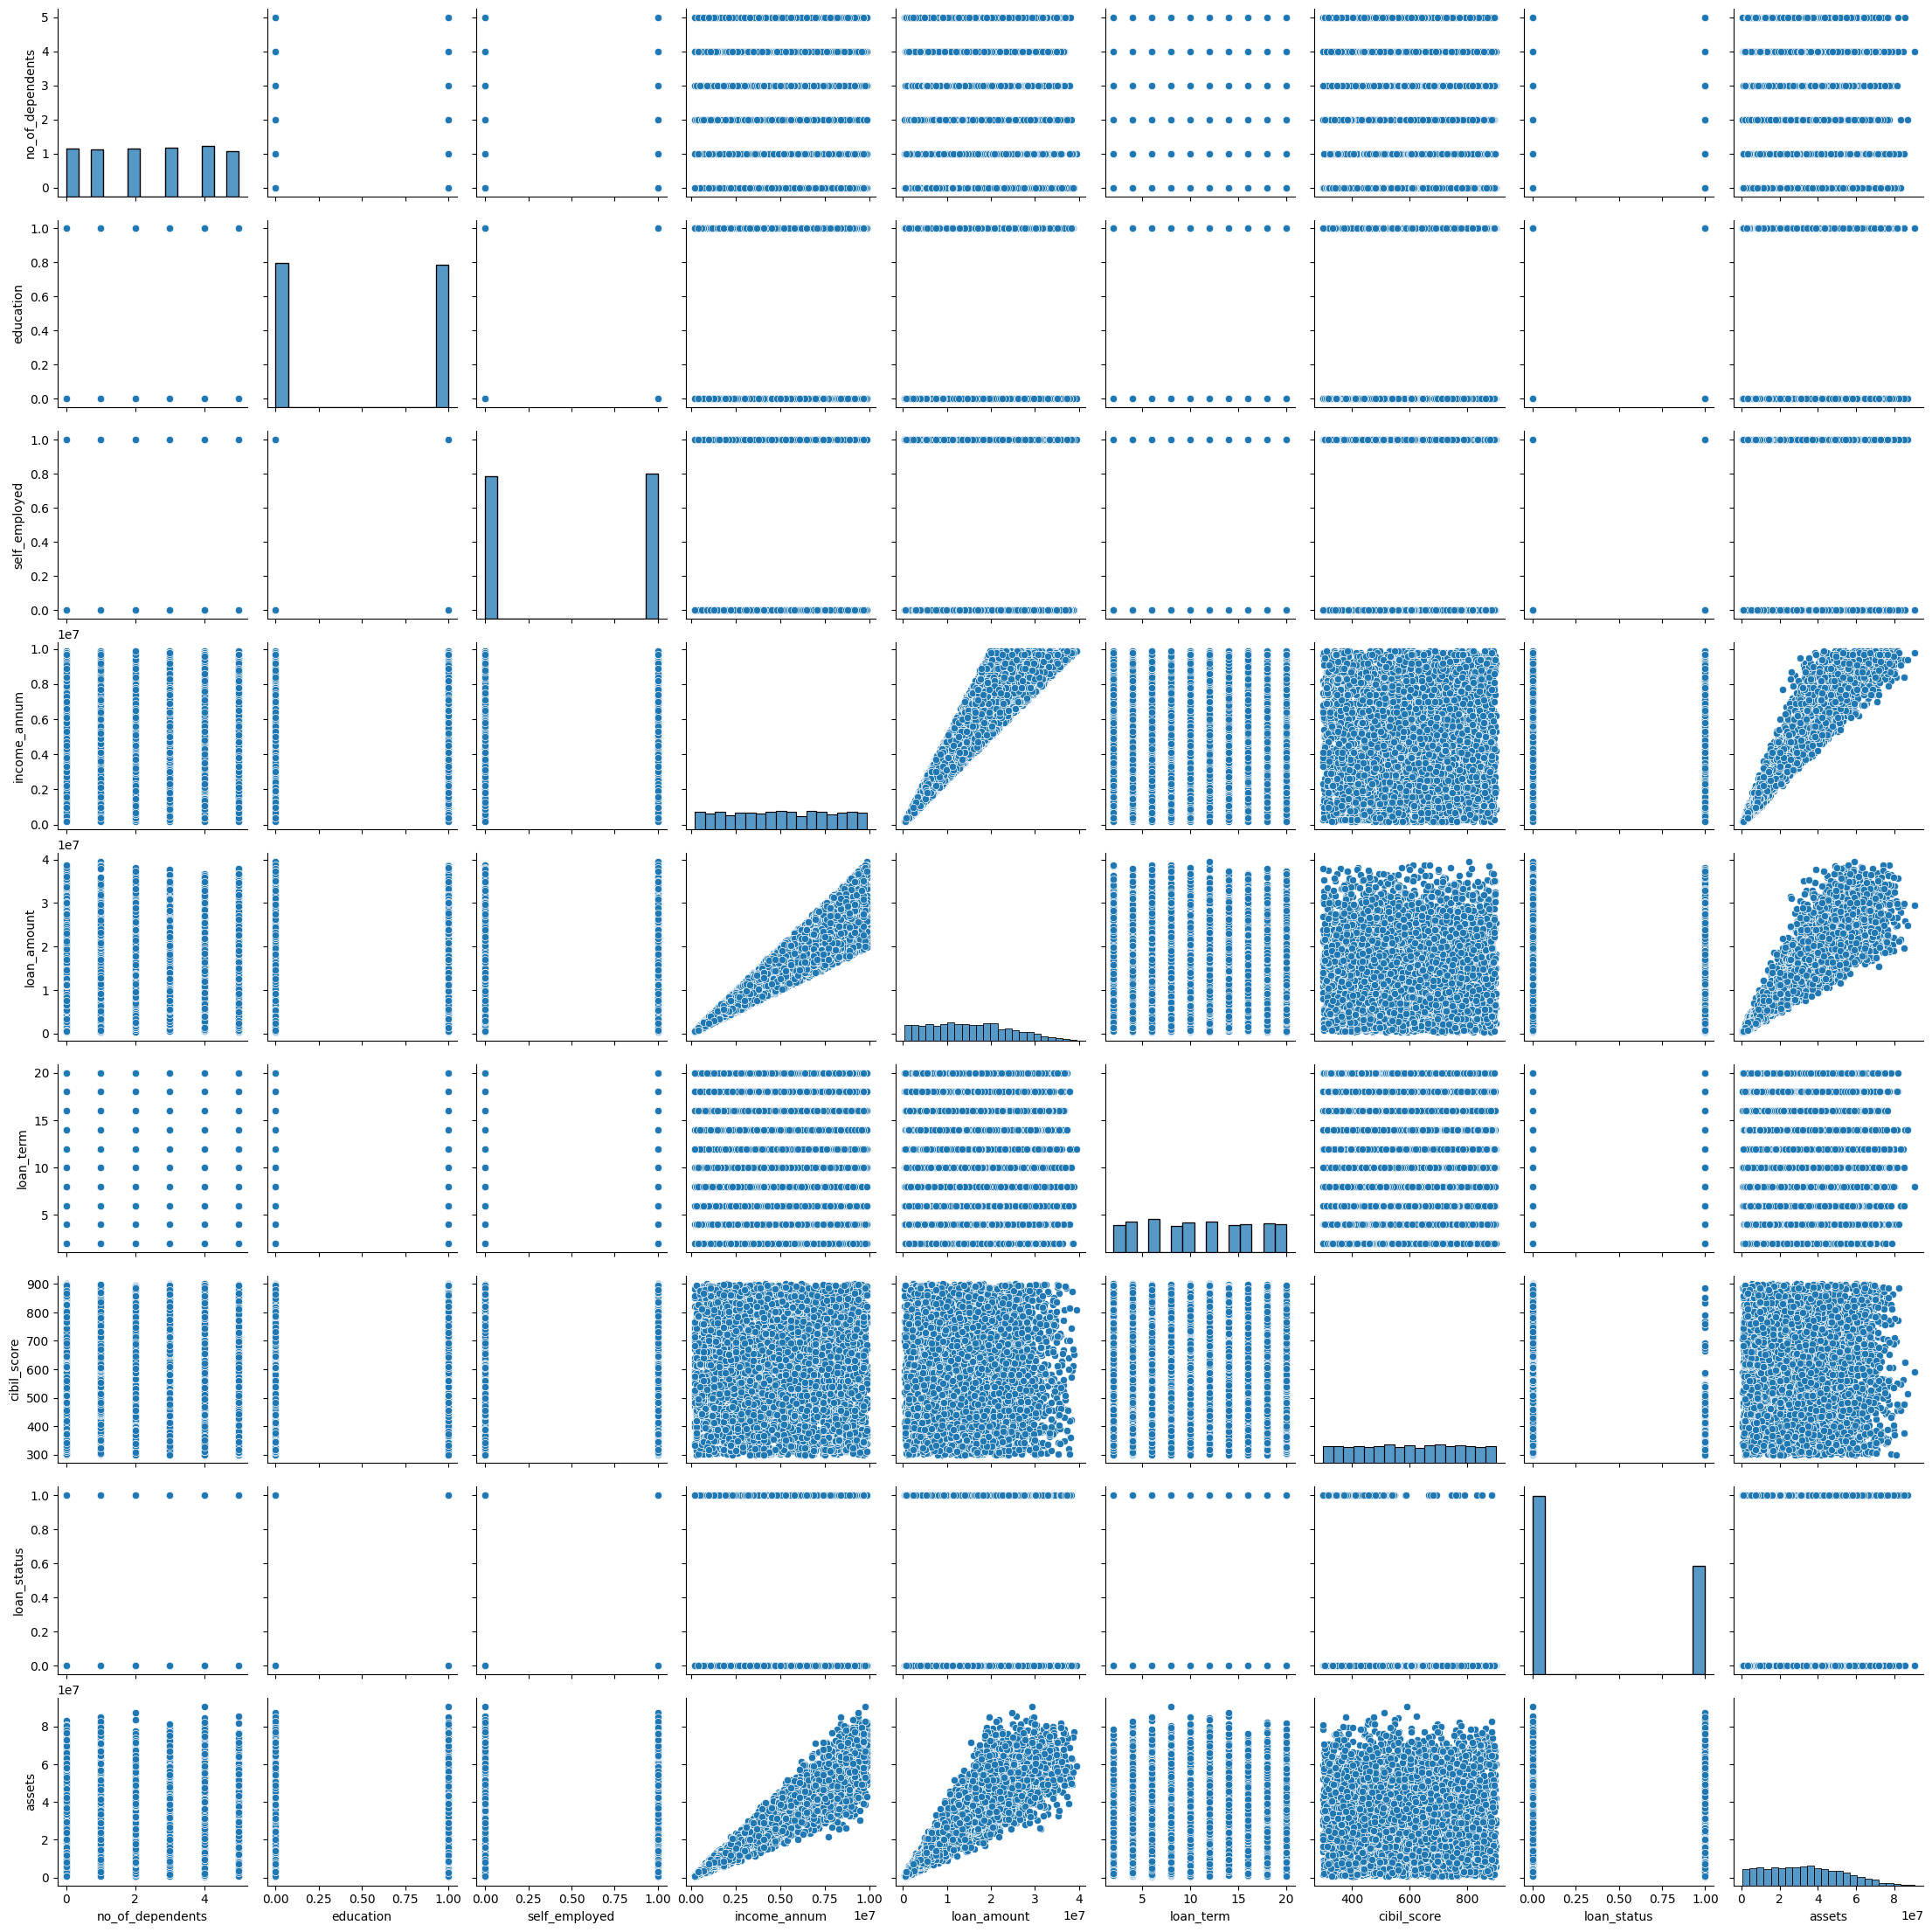

In [44]:
sns.pairplot(df)

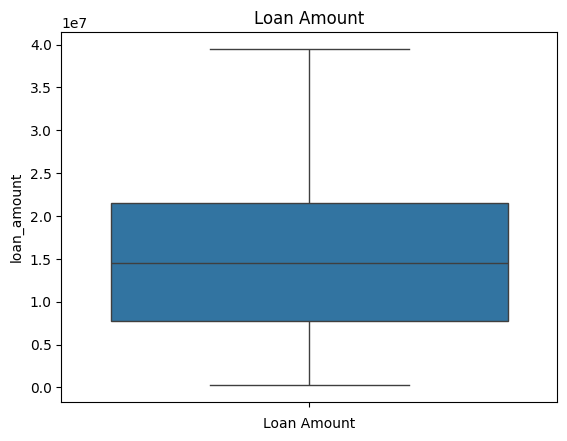

In [9]:
# Distribution of loan status and loan amount

sns.boxplot(df['loan_amount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

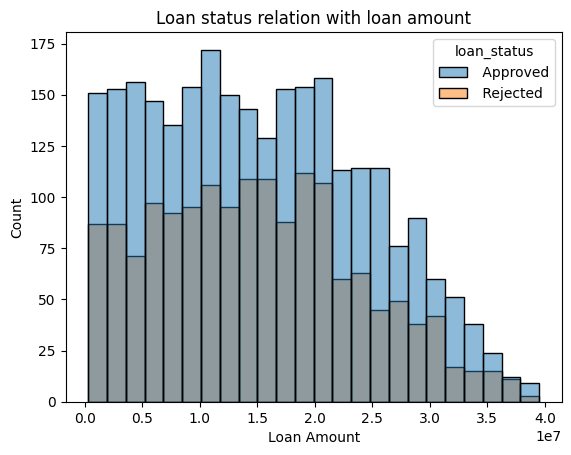

In [10]:
sns.histplot(df, x = 'loan_amount', hue='loan_status')
plt.title("Loan status relation with loan amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

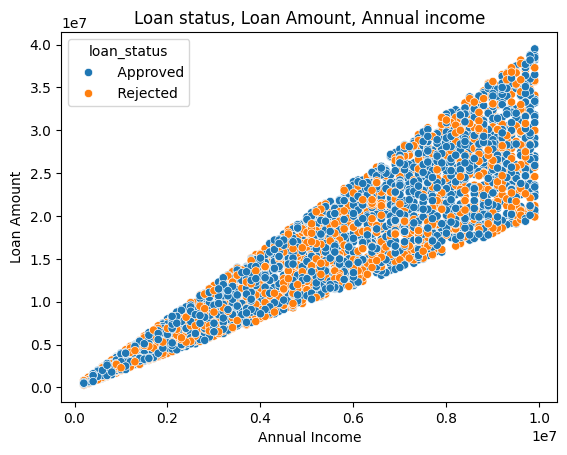

In [11]:
sns.scatterplot(x=df['income_annum'], y= df['loan_amount'], hue = df['loan_status'])
plt.title("Loan status, Loan Amount, Annual income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

# Applicants with highest income have applied for highest loan amount, their loan was approved, but applicants with highest annual income
# who applied for lower loan amount were rejected. 

In [12]:
# to understand the above issue, we will try to study the subset 
df.loc[(df['income_annum']== df['income_annum'].max()) & (df['loan_status']==' Rejected')]

# from this subset, we can infer that the reason from rejection of loan by an applicant with highest annual income but lower loan amount is because of pther factors like cibil score, etc


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
82,2,Not Graduate,Yes,9900000,21200000,16,363,25500000,11400000,26600000,6800000,Rejected
157,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
1179,5,Graduate,No,9900000,35700000,10,392,7900000,4300000,39200000,13000000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1409,3,Graduate,Yes,9900000,29900000,20,490,10500000,9100000,27100000,7400000,Rejected
1547,1,Graduate,Yes,9900000,34100000,14,371,24400000,7100000,29300000,6200000,Rejected
1890,5,Graduate,No,9900000,24600000,2,530,24200000,12800000,20400000,13000000,Rejected
2862,4,Graduate,No,9900000,30000000,18,496,10400000,8000000,29300000,13800000,Rejected
2869,4,Graduate,No,9900000,26100000,2,481,14500000,5000000,23600000,9300000,Rejected
3000,1,Not Graduate,Yes,9900000,25700000,2,340,15600000,18800000,29500000,11800000,Rejected


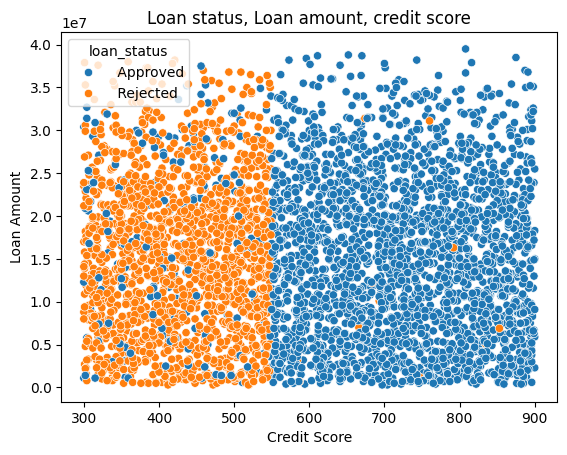

In [13]:
# now we will study about cibil score

sns.scatterplot(x=df['cibil_score'], y = df['loan_amount'], hue = df['loan_status'])
plt.title("Loan status, Loan amount, credit score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

#Here we see that the loan status majorly depends on the cibil score of teh applicant

In [14]:
# some people with high credit score have been reject the loan, even if it was for low loan amount
df.loc[(df['cibil_score'] > 740) & (df['loan_status'] == ' Rejected')].sort_values(['cibil_score'], ascending=False)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
3527,0,Graduate,No,1800000,6900000,10,853,900000,400000,3700000,1700000,Rejected
911,0,Graduate,Yes,1300000,4800000,4,835,500000,100000,3300000,800000,Rejected
3213,1,Not Graduate,Yes,4300000,16300000,14,792,400000,400000,10200000,4000000,Rejected
236,3,Graduate,Yes,900000,3500000,4,770,700000,0,2000000,600000,Rejected
4099,3,Graduate,No,8700000,31100000,16,760,400000,1800000,19300000,4800000,Rejected
1446,1,Graduate,No,300000,1200000,18,747,100000,0,700000,200000,Rejected


In [15]:
# Some insights into loan term

cross_loan_term = pd.crosstab(index = df['loan_term'], columns = df['loan_status'])
cross_loan_term['Total'] = cross_loan_term[' Approved'] + cross_loan_term[' Rejected']
cross_loan_term['Approved_percentage'] = (cross_loan_term[' Approved']/cross_loan_term['Total'])*100
cross_loan_term['Rejected_percentage']= (cross_loan_term[' Rejected']/cross_loan_term['Total'])*100
cross_loan_term

loan_status,Approved,Rejected,Total,Approved_percentage,Rejected_percentage
loan_term,,,,,
2,315,89,404,77.970297,22.029703
4,366,81,447,81.879195,18.120805
6,282,208,490,57.551020,42.448980
8,220,166,386,56.994819,43.005181
10,229,207,436,52.522936,47.477064
12,276,180,456,60.526316,39.473684
14,239,166,405,59.012346,40.987654
16,236,176,412,57.281553,42.718447
18,257,165,422,60.900474,39.099526


In [16]:
df.loc[(df['loan_term']<=4) & (df['loan_status']==' Rejected')].sort_values(['loan_amount']).head(10)

# low cibil score shoild be one of the most important reasons for the application rejection

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1388,4,Graduate,Yes,300000,500000,2,353,600000,100000,1200000,400000,Rejected
1061,3,Not Graduate,No,300000,500000,2,477,700000,200000,800000,400000,Rejected
1199,2,Not Graduate,No,300000,600000,2,383,600000,300000,1100000,400000,Rejected
3393,5,Not Graduate,No,300000,600000,4,418,500000,200000,700000,200000,Rejected
949,2,Graduate,Yes,300000,700000,4,411,600000,0,1200000,100000,Rejected
853,3,Not Graduate,No,300000,800000,2,458,500000,0,1100000,200000,Rejected
519,2,Graduate,Yes,500000,1300000,4,427,1400000,500000,1800000,600000,Rejected
1012,5,Graduate,Yes,500000,1400000,4,471,500000,100000,1300000,300000,Rejected
3475,5,Not Graduate,No,700000,1400000,4,344,1500000,800000,2600000,300000,Rejected
2643,4,Graduate,No,600000,1400000,4,507,200000,300000,1700000,400000,Rejected


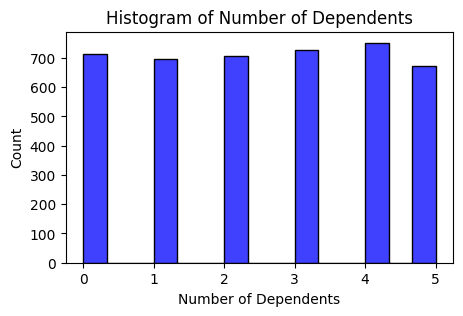

In [17]:
# let's get into the relation of number of dependents 
plt.figure(figsize = (5,3))
sns.histplot(data =df, x = 'no_of_dependents', bins=15, color='blue')
plt.title('Histogram of Number of Dependents')
plt.xlabel('Number of Dependents')

plt.show()

In [18]:
cross_dependents = pd.crosstab(index = df['no_of_dependents'], columns = df['loan_status'])
cross_dependents['Total'] = cross_dependents[' Approved']+ cross_dependents[' Rejected']
cross_dependents['Approved_percentage'] = (cross_dependents[' Approved']/cross_dependents['Total'])*100
cross_dependents['Rejected_percentage'] = (cross_dependents[' Rejected']/cross_dependents['Total'])*100
cross_dependents

loan_status,Approved,Rejected,Total,Approved_percentage,Rejected_percentage
no_of_dependents,,,,,
0,457,255,712,64.185393,35.814607
1,430,267,697,61.692970,38.307030
2,441,267,708,62.288136,37.711864
3,457,270,727,62.861073,37.138927
4,465,287,752,61.835106,38.164894
5,406,267,673,60.326895,39.673105


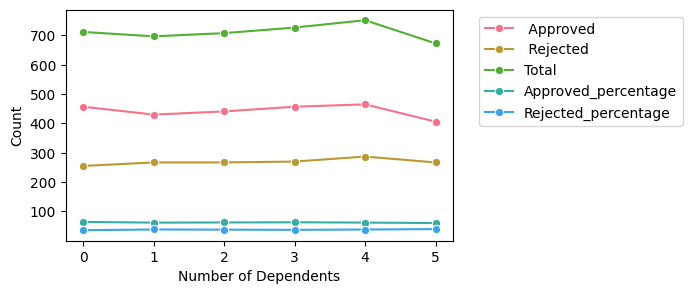

In [19]:
palette = sns.color_palette('husl')
plt.figure(figsize=(5,3))
sns.lineplot(data = cross_dependents, dashes = False, markers ='o', palette = palette)
plt.ylabel("Count")
plt.xlabel("Number of Dependents")
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left')
plt.show()

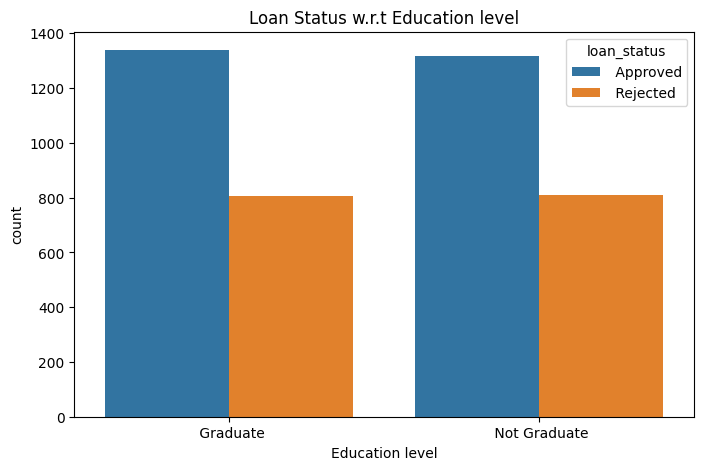

In [20]:
# Understanding impact of education on loan status

plt.figure(figsize = (8,5))
sns.countplot(df, x = 'education', hue = 'loan_status')
plt.xlabel("Education level")
plt.title("Loan Status w.r.t Education level")

plt.show()


In [21]:
# Removing extra spaces from the database
df.columns = df.columns.str.strip()

# Combining all assets into one column
df['assets'] = (df['residential_assets_value'] + df['commercial_assets_value']+ df['luxury_assets_value']+ df['bank_asset_value'])

In [22]:
columns_to_drop = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
df.drop(columns = columns_to_drop, inplace = True)

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [23]:
# Convert categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['education','self_employed','loan_status' ]

# applying label encode to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

print(df)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          0              0       9600000     29900000   
1                    0          1              1       4100000     12200000   
2                    3          0              0       9100000     29700000   
3                    3          0              0       8200000     30700000   
4                    5          1              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          0              1       1000000      2300000   
4265                 0          1              1       3300000     11300000   
4266                 2          1              0       6500000     23900000   
4267                 1          1              0       4100000     12800000   
4268                 1          0              0       9200000     29700000   

      loan_term  cibil_score  loan_status    assets

In [24]:
# Model Development
y = df['loan_status']
x = df.drop(['loan_status'], axis =1)

In [25]:
# split data into train and test data
x_temp, x_test, y_temp, y_test = train_test_split(x, y,  test_size = 0.2, random_state = 42)

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=42)

In [27]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((2561, 8), (2561,), (854, 8), (854,), (854, 8), (854,))

In [28]:
# # Scaling the data
stand_scaler = StandardScaler()
stand_scaler.fit(x_train)
x_train_stand = stand_scaler.transform(x_train)
x_val_stand = stand_scaler.transform(x_val)
x_test_stand = stand_scaler.transform(x_test)

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x_train_stand, y_train)

Lasso(alpha=0.1)

In [31]:
# Implementing model and training the dataset

model = LogisticRegression(random_state= 42)
model.fit(x_train_stand, y_train)

LogisticRegression(random_state=42)

In [32]:
y_lr = model.predict(x_val_stand) 

In [33]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_lr))
print('Precision:', '%.3f' % precision_score(y_val, y_lr))
print('Recall:', '%.3f' % recall_score(y_val, y_lr))
print('F1 Score:', '%.3f' % f1_score(y_val, y_lr))

Accuracy: 0.917
Precision: 0.890
Recall: 0.908
F1 Score: 0.898


## Random Forest Classifier

In [34]:
param_dist ={
    'n_estimators':[50,100,150],
    'max_depth':[None, 10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

rf = RandomForestClassifier(random_state = 42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter = 10, cv = 5, scoring ='accuracy')

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_forest = random_search.best_estimator_

In [35]:
best_params, best_forest

({'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_depth': 10},
 RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42))

In [36]:
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = 20, 
                                min_samples_leaf = 1, min_samples_split = 5,random_state = 42)
rf_opt.fit(x_train, y_train)
y_rf = rf_opt.predict(x_val)

In [37]:
print('Accuracy:', '%.3f' % accuracy_score(y_val, y_rf))
print('Precision:', '%.3f' % precision_score(y_val, y_rf))
print('Recall:', '%.3f' % recall_score(y_val, y_rf))
print('F1 Score:', '%.3f' % f1_score(y_val, y_rf))

Accuracy: 0.977
Precision: 0.977
Recall: 0.965
F1 Score: 0.971


In [38]:
y_test_rf = rf_opt.predict(x_test)

print('Accuracy:', '%.3f' % accuracy_score(y_test, y_test_rf))
print('Precision:', '%.3f' % precision_score(y_test, y_test_rf))
print('Recall:', '%.3f' % recall_score(y_test, y_test_rf))
print('F1 Score:', '%.3f' % f1_score(y_test, y_test_rf))

Accuracy: 0.973
Precision: 0.968
Recall: 0.959
F1 Score: 0.964


In [39]:
# # Saving the model
# import pickle as pk
# with open('rf_opt.pkl', 'wb') as model_file:
#     pk.dump(rf_opt,model_file)
# with open('stand_scaler.pkl', 'wb') as scaler_file:
#     pk.dump(stand_scaler,scaler_file)


In [40]:
# # Saving the model

joblib.dump(rf_opt, 'random_forest_model.pkl')  # Save model




['random_forest_model.pkl']

In [41]:
joblib.dump(stand_scaler, 'scaler.pkl')  # Save scaler

['scaler.pkl']

In [42]:
print(x_test)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
1703                 5          0              0       5400000     19700000   
1173                 2          0              0       5900000     14000000   
308                  3          0              0       9600000     19900000   
1322                 2          0              0       6200000     23400000   
3271                 3          1              1       5800000     14100000   
...                ...        ...            ...           ...          ...   
912                  4          0              0       2500000      5400000   
443                  2          0              0       7700000     16700000   
1483                 5          1              1       5600000     11500000   
668                  4          1              0       2200000      8600000   
1114                 1          1              0       2900000      8900000   

      loan_term  cibil_score    assets  
1703      